# ELG7186 - Winter 2022 - Assignment 2
## Due: <strong>Monday February 28<sup>th</sup> 2022 -- 11:59pm</strong>

The purpose of this assignment is to gain experience building and training neural networks. You will learn:
- Design and train a fully-connected neural network
- Train an existing CNN architecture using fine-tuning
- Visualize the trained model


### Submission Details
Submit your Jupyter notebook .ipynb file using Brightspace. Do not include any other files or images as they will not be reviewed.
<p>
<strong>Make certain that you run all the cells in the notebook you submit</strong> or you will loose marks.
</p>
<ul>
<li>You can submit multiple times, but only the most recent submission will be saved</li>
<li>Do not wait until the last minute to submit in case you have an unexpected issue</li>
<li>Review the late policy in the syllabus</li>
<li><strong>You must submit your own work</strong> and abide by the University of Ottawa policy on plagiarism and fraud</li>
</ul>


### DO NOT submit any images from the dataset

## Part 0. Data Preparation

To complete the assignment you will download the Caltech Bird dataset and devise an appropriate training set split. <b>You are free to sample from the dataset to reduce the overal training samples depending on your access to compute.</b> Again, the overall accuracy is less important than your  observations and comparisons.

Dataset: <a href="http://www.vision.caltech.edu/visipedia/CUB-200-2011.html">Caltech-UCSD Birds-200-2011</a> (Also posed on Brightspace)

The dataset contains annotations for various tasks. In this assignment you will use the categories for classification (species labels)

In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Create your splits for your dataset (there is a split provided for the full dataset) </li>
<li>Visualize five samples of each class by plotting a grid using the matplotlib library.</li>
</ul>


## Setup

In [1]:
import numpy as np
import pandas as pd
import os
import keras
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import tensorflow as tf 
import cv2
from numpy import floor
import random
import glob
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.applications.vgg16 import preprocess_input
from numpy import expand_dims

In [2]:
## Reset graph function to clear the memory 

from keras import backend as K
import gc
def reset_graph():
    tf.compat.v1.reset_default_graph()
    tf.compat.v1.set_random_seed(42)
    sess = K.get_session()
    K.clear_session()
    sess.close()
    sess = K.get_session()
    gc.collect()
    # use the same config as you used to create the session
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 1
    config.gpu_options.visible_device_list = "0"
    K.set_session(tf.compat.v1.Session(config=config))

In [3]:
label_path = open('E:/uOttawa/SecondTerm/CV/Assignment/2/CV_Assignment2/CUB_200_2011/image_class_labels.txt', 'r')

label=[]
for line in label_path:
    i,l = line.split()
    label.append(int(l))

label_path.close()

In [4]:
dataset_path = "E:/uOttawa/SecondTerm/CV/Assignment/2/CV_Assignment2/CUB_200_2011/images/"

size=(128,128)
images=[]
for file in tqdm(glob.iglob(f'{dataset_path}*')):
    for image in os.listdir(file):
        im=cv2.imread(file+ '/' + image)
        im=cv2.resize(im, size, interpolation=cv2.INTER_AREA)
        images.append(im)

0it [00:00, ?it/s]

In [5]:
images=np.array(images)
images=images.astype('float32')/255
#label= to_categorical(np.array(label)-1, num_classes=200)


In [5]:
from keras.utils import np_utils

In [6]:
label=keras.utils.np_utils.to_categorical(np.array(label)-1)

In [88]:
label[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [7]:
X_train,X_test,y_train,y_test=train_test_split(images, label, test_size=0.2)

In [8]:
X_train_s = X_train[:2000]
X_test_s  = X_test[:500]
y_train_s = y_train[:2000]
y_test_s  = y_test[:500]

In [98]:
reset_graph()

In [95]:
y_test_s[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

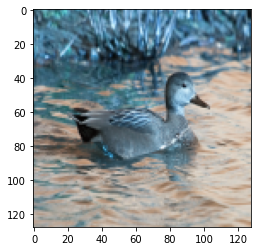

In [96]:
plt.imshow(X_test_s[4])
plt.show()

## Part 1. Perceptron (3 Marks)
For this section you will implement a fully connected neural network (multi-layer perceptron). To do this you will need to perform the following steps:
- Resize the images to be no larger than 32x32.
- Use the sequential model API in keras to build your network using dense layers (consider performance impacts of fully connected layers)
- You must decide an appropriate number of neurons and layers.
- Print a summary of your model configuration. 


When your classifier is working:
- Plot a loss curve for training and test data
- Plot an accuracy curve for training and test data
- Provide a brief discussion of your results 


In [13]:
reset_graph()

In [11]:
### input dimensions 32*32 
input_dim = (128, 128, 3)
### output dimensions 200 classes
output_dim = 200

# creating the sequential model
model = keras.Sequential()
model.add(layers.Flatten(input_shape=input_dim))
model.add(Dropout(0.5))
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=output_dim, activation='softmax'))

# compile the model
model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

# train the model
model_result = model.fit(
    X_train_s, y_train_s,
    epochs=15,
    batch_size=64,
    validation_data=(X_test_s,y_test_s),
    validation_split=0.1,
    verbose=1
    )

# get model summary
model.summary()

Epoch 1/15


ValueError: in user code:

    C:\Users\Ahmed\Anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\Ahmed\Anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Ahmed\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Ahmed\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Ahmed\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Ahmed\Anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\Ahmed\Anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    C:\Users\Ahmed\Anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Ahmed\Anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\input_spec.py:199 assert_input_compatibility
        raise ValueError('Layer ' + layer_name + ' expects ' +

    ValueError: Layer sequential expects 1 input(s), but it received 2000 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:2' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:3' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:4' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:5' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:6' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:7' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:8' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:9' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:10' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:11' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:12' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:13' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:14' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:15' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:16' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:17' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:18' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:19' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:20' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:21' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:22' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:23' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:24' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:25' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:26' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:27' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:28' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:29' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:30' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:31' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:32' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:33' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:34' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:35' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:36' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:37' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:38' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:39' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:40' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:41' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:42' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:43' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:44' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:45' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:46' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:47' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:48' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:49' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:50' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:51' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:52' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:53' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:54' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:55' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:56' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:57' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:58' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:59' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:60' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:61' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:62' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:63' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:64' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:65' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:66' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:67' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:68' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:69' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:70' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:71' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:72' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:73' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:74' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:75' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:76' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:77' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:78' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:79' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:80' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:81' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:82' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:83' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:84' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:85' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:86' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:87' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:88' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:89' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:90' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:91' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:92' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:93' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:94' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:95' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:96' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:97' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:98' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:99' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:100' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:101' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:102' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:103' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:104' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:105' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:106' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:107' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:108' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:109' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:110' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:111' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:112' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:113' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:114' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:115' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:116' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:117' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:118' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:119' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:120' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:121' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:122' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:123' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:124' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:125' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:126' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:127' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:128' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:129' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:130' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:131' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:132' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:133' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:134' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:135' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:136' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:137' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:138' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:139' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:140' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:141' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:142' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:143' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:144' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:145' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:146' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:147' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:148' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:149' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:150' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:151' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:152' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:153' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:154' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:155' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:156' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:157' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:158' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:159' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:160' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:161' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:162' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:163' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:164' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:165' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:166' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:167' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:168' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:169' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:170' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:171' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:172' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:173' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:174' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:175' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:176' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:177' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:178' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:179' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:180' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:181' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:182' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:183' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:184' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:185' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:186' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:187' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:188' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:189' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:190' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:191' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:192' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:193' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:194' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:195' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:196' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:197' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:198' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:199' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:200' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:201' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:202' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:203' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:204' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:205' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:206' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:207' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:208' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:209' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:210' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:211' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:212' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:213' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:214' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:215' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:216' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:217' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:218' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:219' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:220' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:221' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:222' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:223' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:224' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:225' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:226' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:227' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:228' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:229' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:230' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:231' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:232' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:233' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:234' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:235' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:236' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:237' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:238' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:239' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:240' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:241' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:242' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:243' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:244' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:245' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:246' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:247' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:248' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:249' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:250' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:251' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:252' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:253' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:254' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:255' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:256' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:257' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:258' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:259' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:260' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:261' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:262' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:263' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:264' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:265' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:266' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:267' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:268' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:269' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:270' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:271' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:272' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:273' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:274' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:275' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:276' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:277' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:278' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:279' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:280' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:281' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:282' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:283' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:284' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:285' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:286' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:287' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:288' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:289' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:290' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:291' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:292' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:293' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:294' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:295' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:296' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:297' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:298' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:299' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:300' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:301' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:302' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:303' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:304' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:305' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:306' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:307' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:308' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:309' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:310' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:311' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:312' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:313' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:314' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:315' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:316' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:317' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:318' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:319' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:320' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:321' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:322' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:323' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:324' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:325' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:326' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:327' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:328' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:329' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:330' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:331' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:332' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:333' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:334' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:335' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:336' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:337' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:338' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:339' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:340' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:341' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:342' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:343' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:344' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:345' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:346' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:347' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:348' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:349' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:350' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:351' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:352' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:353' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:354' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:355' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:356' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:357' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:358' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:359' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:360' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:361' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:362' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:363' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:364' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:365' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:366' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:367' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:368' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:369' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:370' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:371' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:372' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:373' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:374' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:375' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:376' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:377' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:378' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:379' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:380' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:381' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:382' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:383' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:384' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:385' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:386' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:387' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:388' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:389' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:390' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:391' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:392' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:393' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:394' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:395' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:396' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:397' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:398' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:399' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:400' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:401' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:402' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:403' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:404' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:405' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:406' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:407' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:408' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:409' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:410' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:411' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:412' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:413' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:414' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:415' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:416' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:417' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:418' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:419' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:420' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:421' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:422' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:423' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:424' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:425' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:426' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:427' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:428' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:429' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:430' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:431' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:432' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:433' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:434' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:435' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:436' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:437' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:438' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:439' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:440' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:441' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:442' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:443' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:444' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:445' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:446' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:447' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:448' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:449' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:450' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:451' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:452' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:453' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:454' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:455' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:456' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:457' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:458' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:459' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:460' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:461' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:462' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:463' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:464' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:465' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:466' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:467' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:468' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:469' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:470' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:471' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:472' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:473' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:474' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:475' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:476' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:477' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:478' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:479' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:480' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:481' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:482' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:483' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:484' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:485' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:486' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:487' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:488' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:489' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:490' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:491' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:492' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:493' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:494' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:495' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:496' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:497' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:498' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:499' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:500' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:501' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:502' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:503' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:504' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:505' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:506' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:507' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:508' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:509' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:510' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:511' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:512' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:513' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:514' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:515' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:516' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:517' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:518' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:519' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:520' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:521' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:522' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:523' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:524' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:525' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:526' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:527' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:528' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:529' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:530' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:531' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:532' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:533' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:534' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:535' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:536' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:537' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:538' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:539' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:540' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:541' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:542' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:543' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:544' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:545' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:546' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:547' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:548' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:549' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:550' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:551' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:552' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:553' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:554' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:555' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:556' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:557' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:558' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:559' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:560' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:561' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:562' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:563' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:564' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:565' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:566' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:567' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:568' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:569' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:570' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:571' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:572' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:573' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:574' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:575' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:576' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:577' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:578' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:579' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:580' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:581' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:582' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:583' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:584' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:585' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:586' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:587' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:588' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:589' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:590' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:591' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:592' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:593' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:594' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:595' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:596' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:597' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:598' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:599' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:600' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:601' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:602' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:603' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:604' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:605' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:606' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:607' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:608' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:609' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:610' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:611' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:612' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:613' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:614' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:615' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:616' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:617' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:618' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:619' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:620' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:621' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:622' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:623' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:624' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:625' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:626' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:627' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:628' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:629' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:630' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:631' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:632' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:633' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:634' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:635' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:636' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:637' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:638' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:639' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:640' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:641' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:642' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:643' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:644' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:645' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:646' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:647' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:648' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:649' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:650' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:651' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:652' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:653' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:654' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:655' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:656' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:657' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:658' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:659' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:660' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:661' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:662' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:663' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:664' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:665' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:666' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:667' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:668' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:669' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:670' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:671' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:672' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:673' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:674' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:675' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:676' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:677' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:678' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:679' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:680' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:681' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:682' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:683' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:684' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:685' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:686' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:687' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:688' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:689' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:690' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:691' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:692' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:693' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:694' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:695' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:696' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:697' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:698' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:699' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:700' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:701' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:702' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:703' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:704' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:705' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:706' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:707' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:708' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:709' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:710' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:711' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:712' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:713' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:714' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:715' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:716' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:717' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:718' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:719' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:720' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:721' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:722' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:723' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:724' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:725' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:726' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:727' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:728' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:729' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:730' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:731' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:732' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:733' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:734' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:735' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:736' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:737' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:738' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:739' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:740' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:741' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:742' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:743' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:744' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:745' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:746' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:747' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:748' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:749' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:750' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:751' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:752' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:753' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:754' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:755' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:756' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:757' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:758' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:759' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:760' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:761' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:762' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:763' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:764' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:765' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:766' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:767' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:768' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:769' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:770' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:771' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:772' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:773' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:774' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:775' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:776' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:777' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:778' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:779' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:780' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:781' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:782' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:783' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:784' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:785' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:786' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:787' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:788' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:789' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:790' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:791' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:792' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:793' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:794' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:795' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:796' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:797' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:798' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:799' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:800' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:801' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:802' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:803' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:804' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:805' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:806' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:807' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:808' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:809' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:810' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:811' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:812' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:813' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:814' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:815' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:816' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:817' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:818' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:819' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:820' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:821' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:822' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:823' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:824' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:825' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:826' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:827' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:828' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:829' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:830' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:831' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:832' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:833' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:834' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:835' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:836' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:837' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:838' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:839' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:840' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:841' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:842' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:843' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:844' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:845' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:846' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:847' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:848' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:849' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:850' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:851' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:852' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:853' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:854' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:855' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:856' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:857' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:858' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:859' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:860' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:861' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:862' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:863' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:864' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:865' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:866' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:867' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:868' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:869' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:870' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:871' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:872' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:873' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:874' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:875' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:876' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:877' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:878' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:879' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:880' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:881' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:882' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:883' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:884' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:885' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:886' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:887' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:888' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:889' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:890' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:891' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:892' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:893' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:894' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:895' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:896' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:897' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:898' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:899' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:900' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:901' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:902' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:903' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:904' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:905' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:906' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:907' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:908' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:909' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:910' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:911' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:912' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:913' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:914' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:915' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:916' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:917' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:918' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:919' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:920' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:921' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:922' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:923' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:924' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:925' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:926' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:927' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:928' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:929' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:930' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:931' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:932' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:933' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:934' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:935' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:936' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:937' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:938' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:939' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:940' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:941' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:942' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:943' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:944' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:945' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:946' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:947' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:948' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:949' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:950' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:951' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:952' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:953' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:954' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:955' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:956' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:957' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:958' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:959' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:960' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:961' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:962' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:963' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:964' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:965' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:966' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:967' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:968' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:969' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:970' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:971' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:972' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:973' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:974' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:975' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:976' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:977' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:978' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:979' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:980' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:981' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:982' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:983' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:984' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:985' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:986' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:987' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:988' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:989' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:990' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:991' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:992' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:993' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:994' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:995' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:996' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:997' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:998' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:999' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1000' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1001' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1002' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1003' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1004' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1005' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1006' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1007' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1008' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1009' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1010' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1011' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1012' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1013' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1014' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1015' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1016' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1017' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1018' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1019' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1020' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1021' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1022' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1023' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1024' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1025' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1026' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1027' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1028' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1029' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1030' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1031' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1032' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1033' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1034' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1035' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1036' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1037' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1038' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1039' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1040' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1041' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1042' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1043' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1044' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1045' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1046' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1047' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1048' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1049' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1050' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1051' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1052' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1053' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1054' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1055' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1056' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1057' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1058' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1059' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1060' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1061' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1062' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1063' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1064' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1065' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1066' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1067' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1068' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1069' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1070' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1071' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1072' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1073' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1074' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1075' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1076' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1077' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1078' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1079' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1080' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1081' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1082' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1083' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1084' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1085' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1086' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1087' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1088' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1089' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1090' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1091' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1092' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1093' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1094' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1095' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1096' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1097' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1098' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1099' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1100' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1101' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1102' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1103' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1104' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1105' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1106' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1107' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1108' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1109' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1110' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1111' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1112' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1113' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1114' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1115' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1116' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1117' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1118' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1119' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1120' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1121' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1122' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1123' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1124' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1125' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1126' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1127' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1128' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1129' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1130' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1131' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1132' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1133' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1134' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1135' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1136' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1137' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1138' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1139' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1140' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1141' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1142' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1143' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1144' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1145' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1146' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1147' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1148' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1149' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1150' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1151' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1152' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1153' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1154' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1155' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1156' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1157' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1158' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1159' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1160' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1161' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1162' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1163' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1164' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1165' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1166' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1167' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1168' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1169' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1170' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1171' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1172' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1173' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1174' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1175' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1176' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1177' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1178' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1179' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1180' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1181' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1182' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1183' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1184' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1185' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1186' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1187' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1188' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1189' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1190' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1191' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1192' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1193' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1194' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1195' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1196' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1197' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1198' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1199' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1200' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1201' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1202' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1203' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1204' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1205' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1206' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1207' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1208' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1209' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1210' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1211' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1212' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1213' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1214' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1215' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1216' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1217' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1218' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1219' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1220' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1221' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1222' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1223' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1224' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1225' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1226' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1227' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1228' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1229' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1230' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1231' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1232' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1233' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1234' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1235' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1236' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1237' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1238' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1239' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1240' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1241' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1242' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1243' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1244' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1245' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1246' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1247' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1248' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1249' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1250' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1251' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1252' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1253' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1254' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1255' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1256' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1257' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1258' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1259' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1260' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1261' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1262' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1263' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1264' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1265' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1266' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1267' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1268' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1269' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1270' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1271' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1272' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1273' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1274' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1275' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1276' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1277' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1278' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1279' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1280' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1281' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1282' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1283' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1284' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1285' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1286' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1287' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1288' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1289' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1290' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1291' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1292' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1293' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1294' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1295' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1296' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1297' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1298' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1299' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1300' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1301' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1302' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1303' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1304' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1305' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1306' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1307' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1308' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1309' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1310' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1311' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1312' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1313' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1314' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1315' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1316' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1317' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1318' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1319' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1320' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1321' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1322' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1323' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1324' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1325' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1326' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1327' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1328' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1329' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1330' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1331' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1332' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1333' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1334' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1335' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1336' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1337' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1338' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1339' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1340' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1341' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1342' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1343' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1344' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1345' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1346' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1347' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1348' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1349' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1350' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1351' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1352' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1353' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1354' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1355' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1356' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1357' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1358' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1359' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1360' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1361' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1362' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1363' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1364' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1365' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1366' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1367' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1368' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1369' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1370' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1371' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1372' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1373' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1374' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1375' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1376' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1377' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1378' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1379' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1380' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1381' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1382' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1383' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1384' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1385' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1386' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1387' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1388' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1389' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1390' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1391' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1392' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1393' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1394' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1395' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1396' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1397' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1398' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1399' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1400' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1401' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1402' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1403' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1404' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1405' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1406' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1407' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1408' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1409' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1410' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1411' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1412' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1413' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1414' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1415' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1416' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1417' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1418' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1419' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1420' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1421' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1422' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1423' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1424' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1425' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1426' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1427' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1428' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1429' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1430' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1431' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1432' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1433' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1434' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1435' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1436' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1437' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1438' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1439' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1440' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1441' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1442' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1443' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1444' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1445' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1446' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1447' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1448' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1449' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1450' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1451' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1452' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1453' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1454' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1455' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1456' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1457' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1458' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1459' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1460' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1461' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1462' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1463' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1464' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1465' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1466' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1467' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1468' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1469' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1470' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1471' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1472' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1473' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1474' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1475' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1476' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1477' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1478' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1479' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1480' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1481' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1482' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1483' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1484' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1485' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1486' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1487' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1488' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1489' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1490' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1491' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1492' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1493' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1494' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1495' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1496' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1497' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1498' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1499' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1500' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1501' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1502' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1503' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1504' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1505' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1506' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1507' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1508' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1509' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1510' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1511' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1512' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1513' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1514' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1515' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1516' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1517' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1518' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1519' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1520' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1521' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1522' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1523' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1524' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1525' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1526' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1527' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1528' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1529' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1530' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1531' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1532' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1533' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1534' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1535' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1536' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1537' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1538' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1539' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1540' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1541' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1542' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1543' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1544' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1545' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1546' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1547' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1548' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1549' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1550' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1551' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1552' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1553' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1554' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1555' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1556' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1557' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1558' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1559' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1560' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1561' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1562' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1563' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1564' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1565' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1566' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1567' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1568' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1569' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1570' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1571' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1572' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1573' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1574' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1575' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1576' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1577' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1578' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1579' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1580' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1581' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1582' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1583' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1584' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1585' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1586' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1587' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1588' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1589' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1590' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1591' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1592' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1593' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1594' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1595' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1596' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1597' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1598' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1599' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1600' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1601' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1602' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1603' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1604' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1605' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1606' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1607' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1608' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1609' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1610' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1611' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1612' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1613' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1614' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1615' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1616' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1617' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1618' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1619' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1620' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1621' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1622' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1623' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1624' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1625' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1626' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1627' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1628' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1629' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1630' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1631' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1632' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1633' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1634' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1635' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1636' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1637' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1638' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1639' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1640' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1641' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1642' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1643' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1644' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1645' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1646' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1647' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1648' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1649' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1650' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1651' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1652' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1653' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1654' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1655' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1656' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1657' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1658' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1659' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1660' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1661' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1662' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1663' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1664' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1665' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1666' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1667' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1668' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1669' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1670' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1671' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1672' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1673' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1674' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1675' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1676' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1677' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1678' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1679' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1680' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1681' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1682' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1683' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1684' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1685' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1686' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1687' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1688' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1689' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1690' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1691' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1692' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1693' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1694' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1695' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1696' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1697' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1698' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1699' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1700' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1701' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1702' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1703' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1704' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1705' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1706' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1707' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1708' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1709' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1710' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1711' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1712' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1713' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1714' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1715' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1716' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1717' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1718' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1719' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1720' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1721' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1722' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1723' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1724' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1725' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1726' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1727' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1728' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1729' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1730' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1731' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1732' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1733' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1734' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1735' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1736' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1737' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1738' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1739' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1740' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1741' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1742' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1743' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1744' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1745' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1746' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1747' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1748' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1749' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1750' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1751' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1752' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1753' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1754' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1755' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1756' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1757' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1758' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1759' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1760' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1761' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1762' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1763' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1764' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1765' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1766' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1767' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1768' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1769' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1770' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1771' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1772' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1773' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1774' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1775' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1776' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1777' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1778' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1779' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1780' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1781' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1782' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1783' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1784' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1785' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1786' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1787' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1788' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1789' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1790' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1791' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1792' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1793' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1794' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1795' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1796' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1797' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1798' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1799' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1800' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1801' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1802' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1803' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1804' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1805' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1806' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1807' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1808' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1809' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1810' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1811' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1812' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1813' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1814' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1815' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1816' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1817' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1818' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1819' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1820' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1821' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1822' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1823' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1824' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1825' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1826' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1827' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1828' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1829' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1830' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1831' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1832' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1833' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1834' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1835' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1836' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1837' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1838' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1839' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1840' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1841' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1842' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1843' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1844' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1845' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1846' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1847' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1848' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1849' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1850' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1851' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1852' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1853' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1854' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1855' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1856' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1857' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1858' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1859' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1860' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1861' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1862' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1863' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1864' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1865' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1866' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1867' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1868' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1869' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1870' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1871' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1872' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1873' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1874' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1875' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1876' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1877' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1878' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1879' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1880' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1881' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1882' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1883' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1884' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1885' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1886' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1887' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1888' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1889' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1890' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1891' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1892' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1893' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1894' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1895' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1896' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1897' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1898' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1899' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1900' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1901' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1902' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1903' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1904' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1905' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1906' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1907' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1908' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1909' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1910' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1911' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1912' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1913' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1914' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1915' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1916' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1917' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1918' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1919' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1920' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1921' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1922' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1923' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1924' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1925' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1926' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1927' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1928' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1929' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1930' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1931' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1932' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1933' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1934' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1935' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1936' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1937' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1938' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1939' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1940' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1941' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1942' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1943' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1944' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1945' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1946' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1947' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1948' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1949' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1950' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1951' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1952' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1953' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1954' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1955' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1956' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1957' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1958' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1959' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1960' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1961' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1962' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1963' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1964' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1965' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1966' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1967' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1968' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1969' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1970' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1971' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1972' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1973' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1974' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1975' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1976' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1977' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1978' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1979' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1980' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1981' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1982' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1983' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1984' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1985' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1986' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1987' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1988' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1989' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1990' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1991' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1992' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1993' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1994' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1995' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1996' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1997' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1998' shape=(None, 128, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1999' shape=(None, 128, 3) dtype=uint8>]


In [12]:
def resize_fun(images,size):
    new_images=[]
    for im in images:
        new_im=cv2.resize(im, size, interpolation=cv2.INTER_AREA)
        new_images.append(new_im)
    images=np.array(new_images)
    return images

In [14]:
#### Resizing images
size_32=(32,32)
X_train_32 = resize_fun(X_train,size_32)
X_test_32 = resize_fun(X_test,size_32)

In [ ]:
### input dimensions 32*32 
input_dim = (32, 32, 3)
### output dimensions 200 classes
output_dim = 200

# creating the sequential model
model = keras.Sequential()
model.add(layers.Flatten(input_shape=input_dim))
model.add(Dropout(0.5))
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=output_dim, activation='softmax'))

# compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

# train the model
model_result = model.fit(
    X_train_32, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_32,y_test),
    validation_split=0.1,
    verbose=1
    )

# get model summary
model.summary()

Epoch 1/20
266/266 [==============================] - 4s 13ms/step - loss: 23.3366 - accuracy: 0.0041 - val_loss: 5.2992 - val_accuracy: 0.0042
Epoch 2/20
266/266 [==============================] - 4s 13ms/step - loss: 5.3331 - accuracy: 0.0052 - val_loss: 5.2986 - val_accuracy: 0.0064
Epoch 3/20
266/266 [==============================] - 3s 12ms/step - loss: 5.3147 - accuracy: 0.0058 - val_loss: 5.2988 - val_accuracy: 0.0064
Epoch 4/20
 64/266 [======>.......................] - ETA: 2s - loss: 5.3016 - accuracy: 0.0068

In [14]:
pred=model.predict(X_train_32)
print(pred.shape)

(9430, 200)


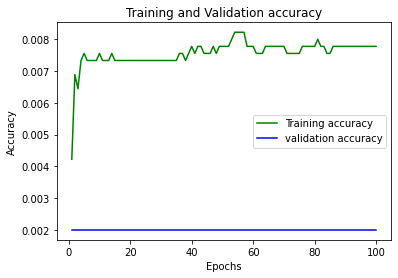

In [19]:
acc_train = model_result.history['accuracy']
acc_val = model_result.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

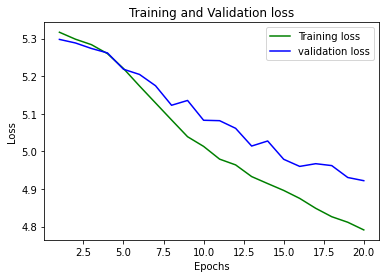

In [16]:
loss_train = model_result.history['loss']
loss_val = model_result.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
the 

## Part 2. VGG-16 (4 Marks)

For this section you will adapt the VGG-16 network for the current task using tranfer learning and fine-tuning. You will implement the following in your process:
- You should choose a suitable image size.
- Choose a suitable labelling scheme.
- Use the pretrained VGG16 network available in Keras.
- Remove the top fully connected layers. Include your own FC layers that match our dataset.
- Choose some layers to "freeze" and the remaining layers you will fine-tune with the new dataset.

### Step 1
You will use the above steps to train a VGG-16 model using the Bird dataset
- Use transfer learning to train your first model by removing the FC layers, but leaving the other layers intact.
- Plot a loss curve for training and test data
- Plot an accuracy curve for training and test data

### Step 2
Now use the same steps as above, but this time unfreeze some convolutional layers and retrain the network. Again, plot your results.

### Step 3
Discuss the results of both methods from step 1 and step 2 while using plots and graphics to support your discussion.


### step 1 

In [18]:
base_vgg_model = VGG16(weights = "imagenet", include_top=False, input_shape = (32, 32, 3))
base_vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [19]:
# Freeze four convolution blocks
for layer in base_vgg_model.layers:
    layer.trainable = False
    
# Make sure you have frozen the correct layers
for i, layer in enumerate(base_vgg_model.layers):
    print(i, layer.name, layer.trainable)

base_vgg_model.summary()

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0   

In [20]:
model = keras.Sequential()
model.add(base_vgg_model)
model.add(layers.Flatten())
model.add(Dropout(0.5))
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=200, activation='softmax'))

reset_graph()
# compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

In [21]:
# train the model
model_history= model.fit(
    X_train_32, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_32,y_test),
    validation_split=0.1,
    verbose=1
)

Epoch 1/20
266/266 [==============================] - 39s 117ms/step - loss: 5.3108 - accuracy: 0.0052 - val_loss: 5.2870 - val_accuracy: 0.0064
Epoch 2/20
266/266 [==============================] - 28s 107ms/step - loss: 5.2790 - accuracy: 0.0093 - val_loss: 5.2649 - val_accuracy: 0.0117
Epoch 3/20
266/266 [==============================] - 28s 105ms/step - loss: 5.2353 - accuracy: 0.0115 - val_loss: 5.1969 - val_accuracy: 0.0127
Epoch 4/20
266/266 [==============================] - 28s 104ms/step - loss: 5.1401 - accuracy: 0.0179 - val_loss: 5.0923 - val_accuracy: 0.0148
Epoch 5/20
266/266 [==============================] - 28s 104ms/step - loss: 5.0276 - accuracy: 0.0205 - val_loss: 4.9914 - val_accuracy: 0.0276
Epoch 6/20
266/266 [==============================] - 28s 104ms/step - loss: 4.9296 - accuracy: 0.0279 - val_loss: 4.9208 - val_accuracy: 0.0392
Epoch 7/20
266/266 [==============================] - 28s 104ms/step - loss: 4.8547 - accuracy: 0.0316 - val_loss: 4.8708 - val_ac

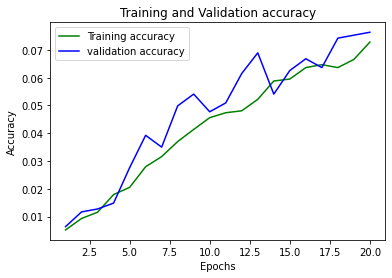

In [22]:
acc_train = model_history.history['accuracy']
acc_val = model_history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

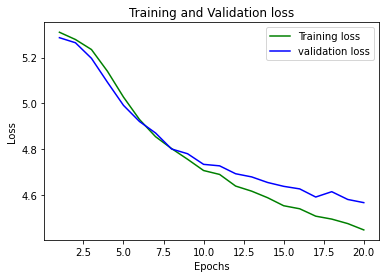

In [23]:
loss_train = model_history.history['loss']
loss_val = model_history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Step 2

In [46]:
first_vgg_model = VGG16(weights = "imagenet", include_top=False, input_shape = (32, 32, 3))
first_vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [47]:
# Freeze four convolution blocks
for layer in first_vgg_model.layers[:15]:
    layer.trainable = False
    
# Make sure you have frozen the correct layers
for i, layer in enumerate(first_vgg_model.layers):
    print(i, layer.name, layer.trainable)

first_vgg_model.summary()

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0       

In [53]:
model_1 = keras.Sequential()
model_1.add(first_vgg_model)
model_1.add(layers.Flatten())
model_1.add(Dropout(0.5))
model_1.add(layers.Dense(units=512, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(layers.Dense(units=512, activation='relu'))
model_1.add(layers.Dense(units=200, activation='softmax'))

reset_graph()

# compile the model
model_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

In [54]:
# train the model
model_1_hist= model_1.fit(
    X_train_32, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_32,y_test),
    validation_split=0.1,
    verbose=1
)

Epoch 1/20
266/266 [==============================] - 49s 182ms/step - loss: 5.2988 - accuracy: 0.0037 - val_loss: 5.2988 - val_accuracy: 0.0011
Epoch 2/20
266/266 [==============================] - 47s 178ms/step - loss: 5.2982 - accuracy: 0.0049 - val_loss: 5.2996 - val_accuracy: 0.0042
Epoch 3/20
266/266 [==============================] - 47s 178ms/step - loss: 5.2979 - accuracy: 0.0053 - val_loss: 5.3003 - val_accuracy: 0.0032
Epoch 4/20
266/266 [==============================] - 47s 178ms/step - loss: 5.2975 - accuracy: 0.0058 - val_loss: 5.3010 - val_accuracy: 0.0032
Epoch 5/20
266/266 [==============================] - 47s 178ms/step - loss: 5.2972 - accuracy: 0.0054 - val_loss: 5.3016 - val_accuracy: 0.0032
Epoch 6/20
266/266 [==============================] - 47s 179ms/step - loss: 5.2970 - accuracy: 0.0052 - val_loss: 5.3022 - val_accuracy: 0.0032
Epoch 7/20
266/266 [==============================] - 47s 179ms/step - loss: 5.2967 - accuracy: 0.0060 - val_loss: 5.3028 - val_ac

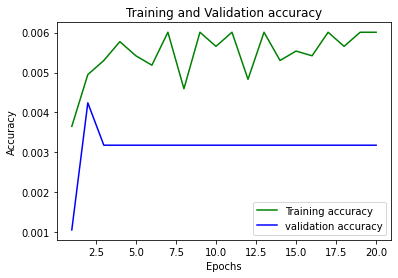

In [55]:
acc_train = model_1_hist.history['accuracy']
acc_val = model_1_hist.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

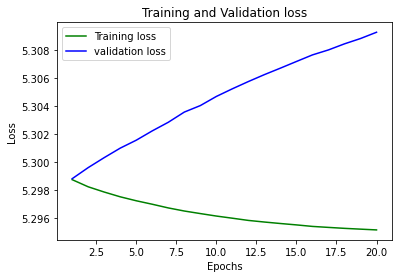

In [56]:
loss_train = model_1_hist.history['loss']
loss_val = model_1_hist.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Write your discussion here.

## Part 3. Visualization (3 Marks)

For this section you will visualize the filters learned byyour VGG-16 network and use t-SNE to observe clusters that were learned by your model.
- Make sure to provide the graphic results for your visualizations
- Provide an interpretation of the results

## Bonus (1 Mark)
Visualize the activation maps produced by your network and discuss the results using an image from the test test and another image of your choice.

In [31]:
# Write your visualization code here.
def plot_filt(filt):
    
    fig, axes = plt.subplots(1, 3, figsize=(5,5))
    axes = axes.flatten()
    
    for img, ax in zip( filt, axes):
        ax.imshow(img)
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()
    

block5_pool (3, 3, 3, 64)
64


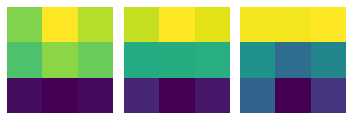

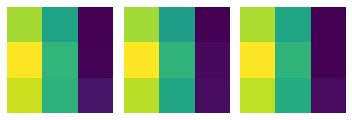

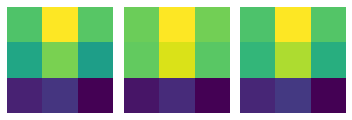

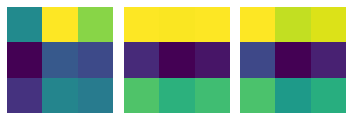

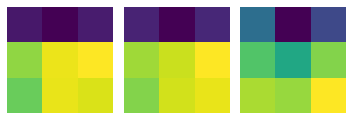

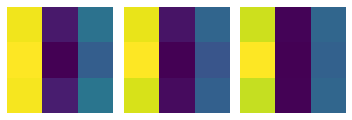

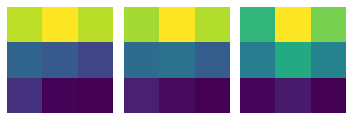

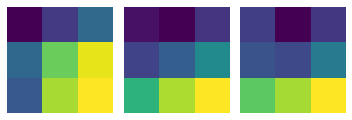

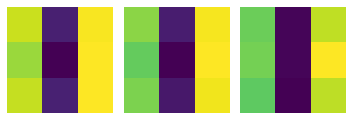

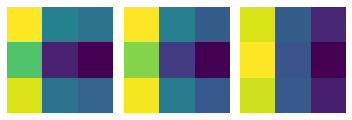

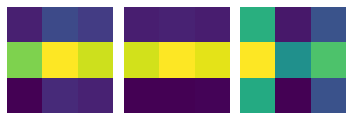

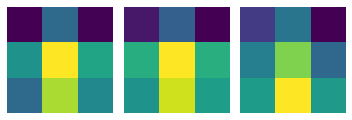

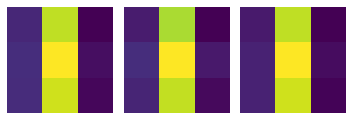

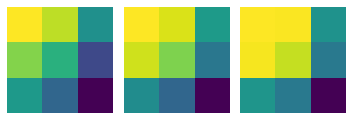

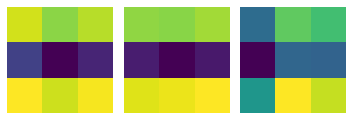

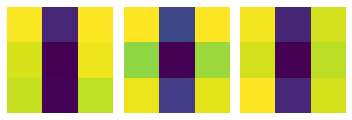

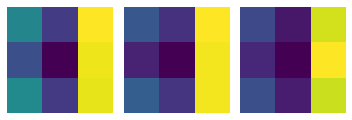

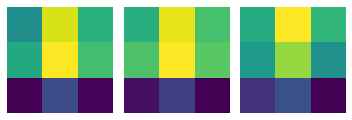

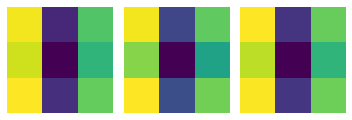

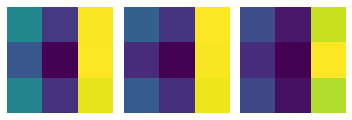

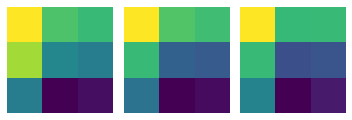

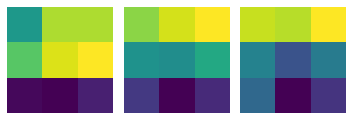

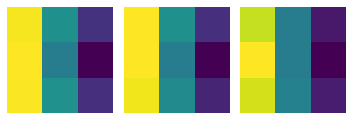

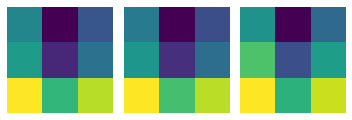

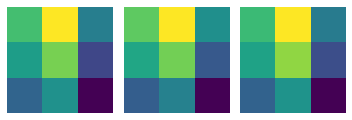

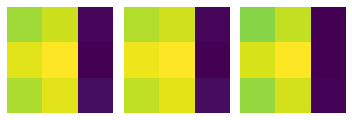

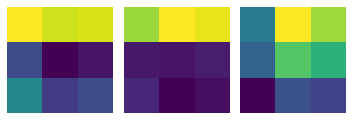

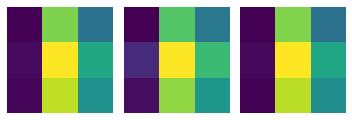

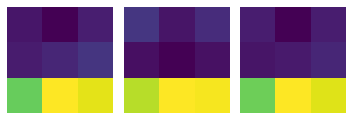

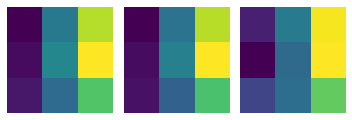

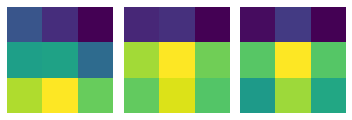

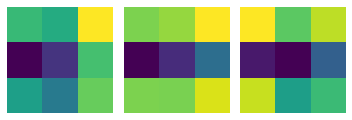

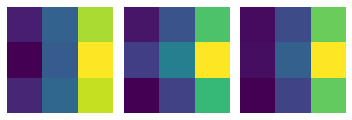

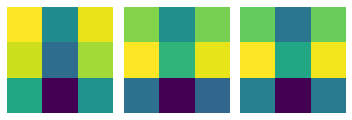

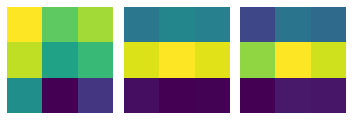

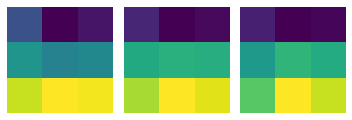

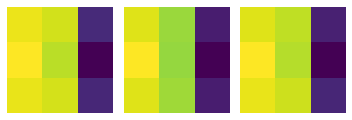

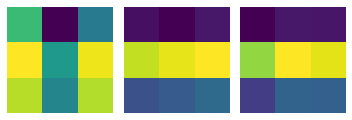

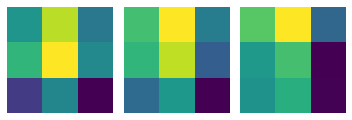

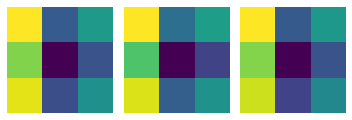

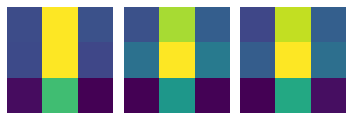

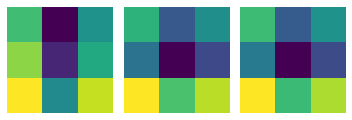

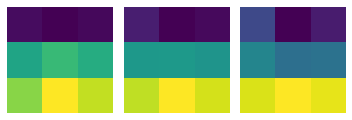

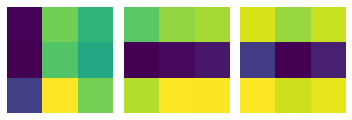

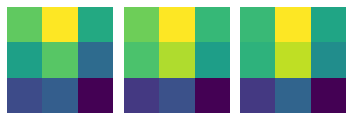

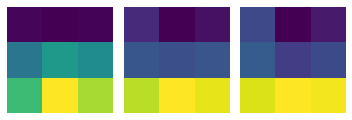

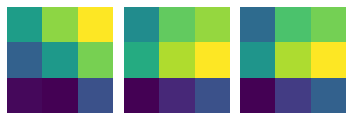

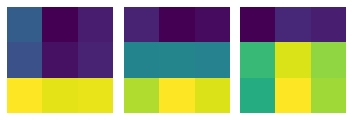

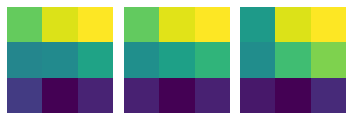

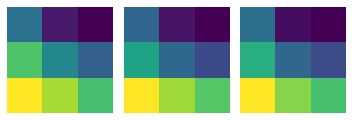

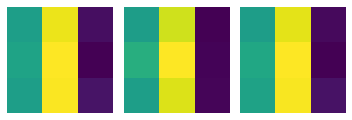

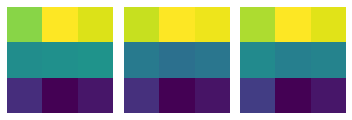

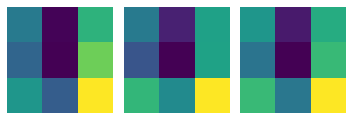

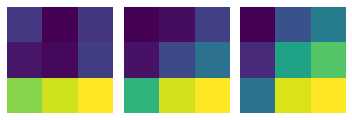

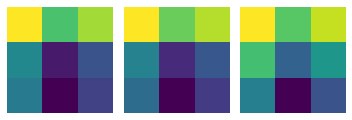

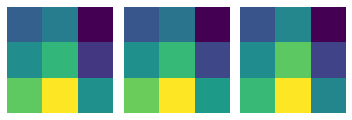

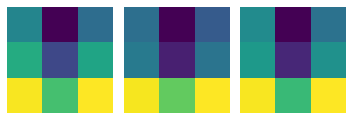

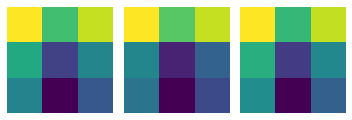

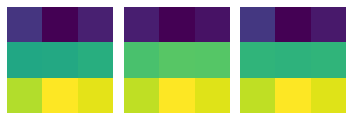

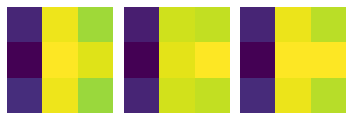

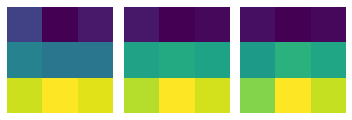

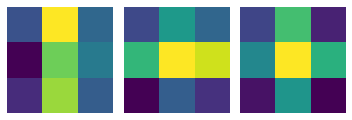

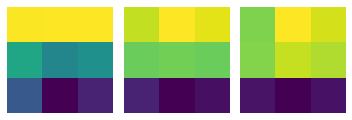

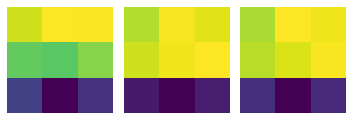

In [33]:

filters, bias= base_vgg_model.layers[1].get_weights()
print(layer.name, filters.shape)
 #normalize filter values between  0 and 1 for visualization
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

print(filters.shape[3])

for i in range(filters.shape[3]):
    filt=filters[:,:,:, i]
    fig, axes = plt.subplots(1, 3, figsize=(5,5))
    axes = axes.flatten()

    for img, ax in zip( filt, axes):
        ax.imshow(img)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

block1_conv1 (3, 3, 3, 64)
64


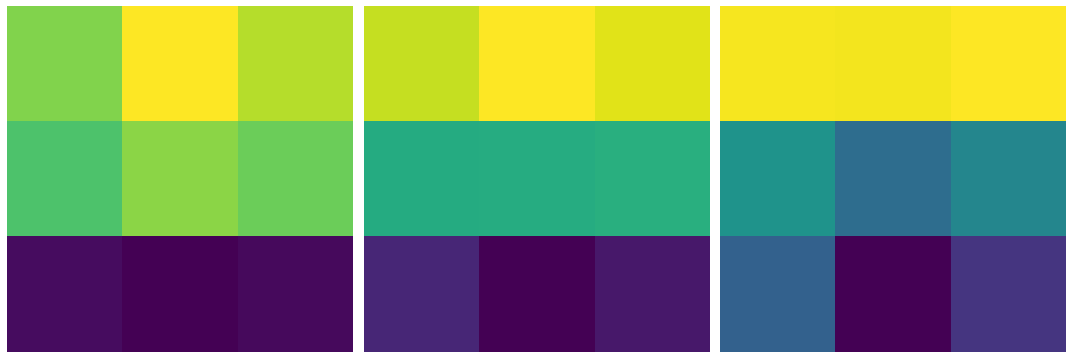

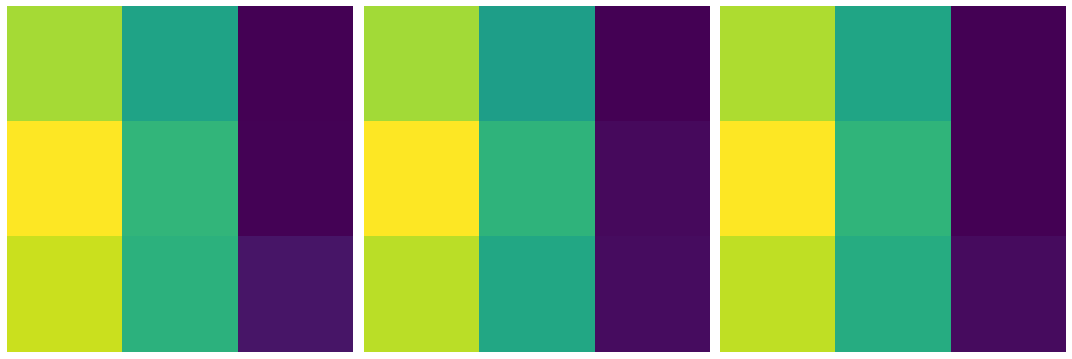

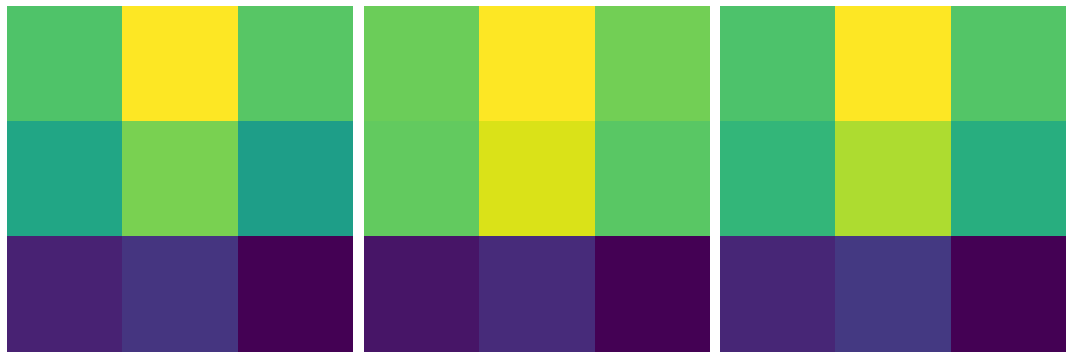

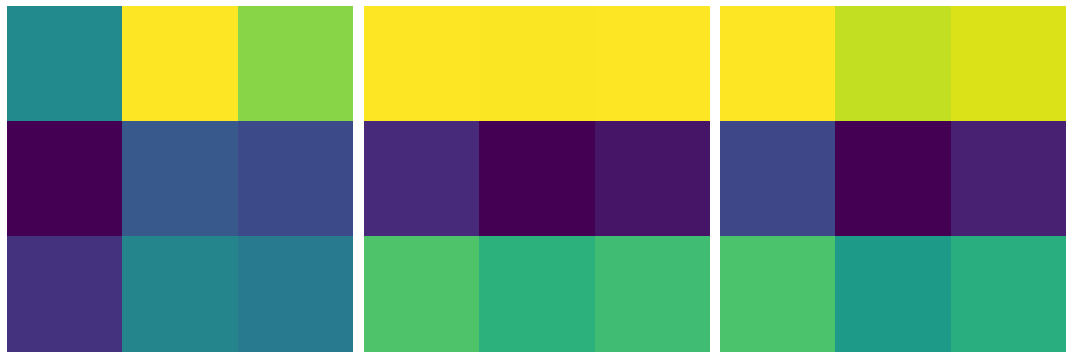

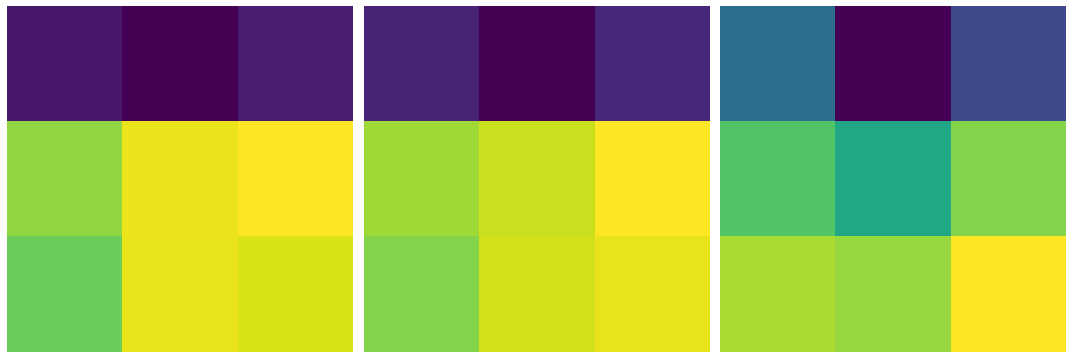

block1_conv2 (3, 3, 64, 64)
64


block2_conv1 (3, 3, 64, 128)
128


block2_conv2 (3, 3, 128, 128)
128


block3_conv1 (3, 3, 128, 256)
256


block3_conv2 (3, 3, 256, 256)
256


block3_conv3 (3, 3, 256, 256)
256


block4_conv1 (3, 3, 256, 512)
512


block4_conv2 (3, 3, 512, 512)
512


block4_conv3 (3, 3, 512, 512)
512


block5_conv1 (3, 3, 512, 512)
512


block5_conv2 (3, 3, 512, 512)
512


block5_conv3 (3, 3, 512, 512)
512


In [34]:
for layer in base_vgg_model.layers:
    if 'conv' in layer.name:
        filters, bias= layer.get_weights()
        print(layer.name, filters.shape)
         #normalize filter values between  0 and 1 for visualization
        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)
        
        print(filters.shape[3])
        
        for i in range(5):
            filt=filters[:,:,:, i]
            fig, axes = plt.subplots(1, 3, figsize=(15,15))
            axes = axes.flatten()

            for img, ax in zip( filt, axes):
                ax.imshow(img)
                ax.axis('off')

            plt.tight_layout()
            plt.show()

In [59]:
from sklearn.manifold import TSNE

In [75]:
out = model_1.get_layer('dense_1').output
vgg_model_feature = Model(model_1.input, out)
feature=vgg_model_feature.predict(X_test_32)

In [76]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
tsne = tsne.fit_transform(feature) 

C:\Users\Ahmed\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Ahmed\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2358 samples in 0.002s...
[t-SNE] Computed neighbors for 2358 samples in 0.243s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2358
[t-SNE] Computed conditional probabilities for sample 2000 / 2358
[t-SNE] Computed conditional probabilities for sample 2358 / 2358
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 113.899193
[t-SNE] KL divergence after 800 iterations: 2.402343


In [77]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

In [78]:
from PIL import Image
width = 5000
height = 4000
max_dim = 200
full_image = Image.new('RGB', (width, height))
for idx, x in enumerate(X_test_32):
    tile = Image.fromarray(np.uint8(x * 255))
    rs = max(1, tile.width / max_dim, tile.height / max_dim)
    tile = tile.resize((int(tile.width / rs),
                        int(tile.height / rs)),
                       Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim) * tx[idx]),
                            int((height-max_dim) * ty[idx])))

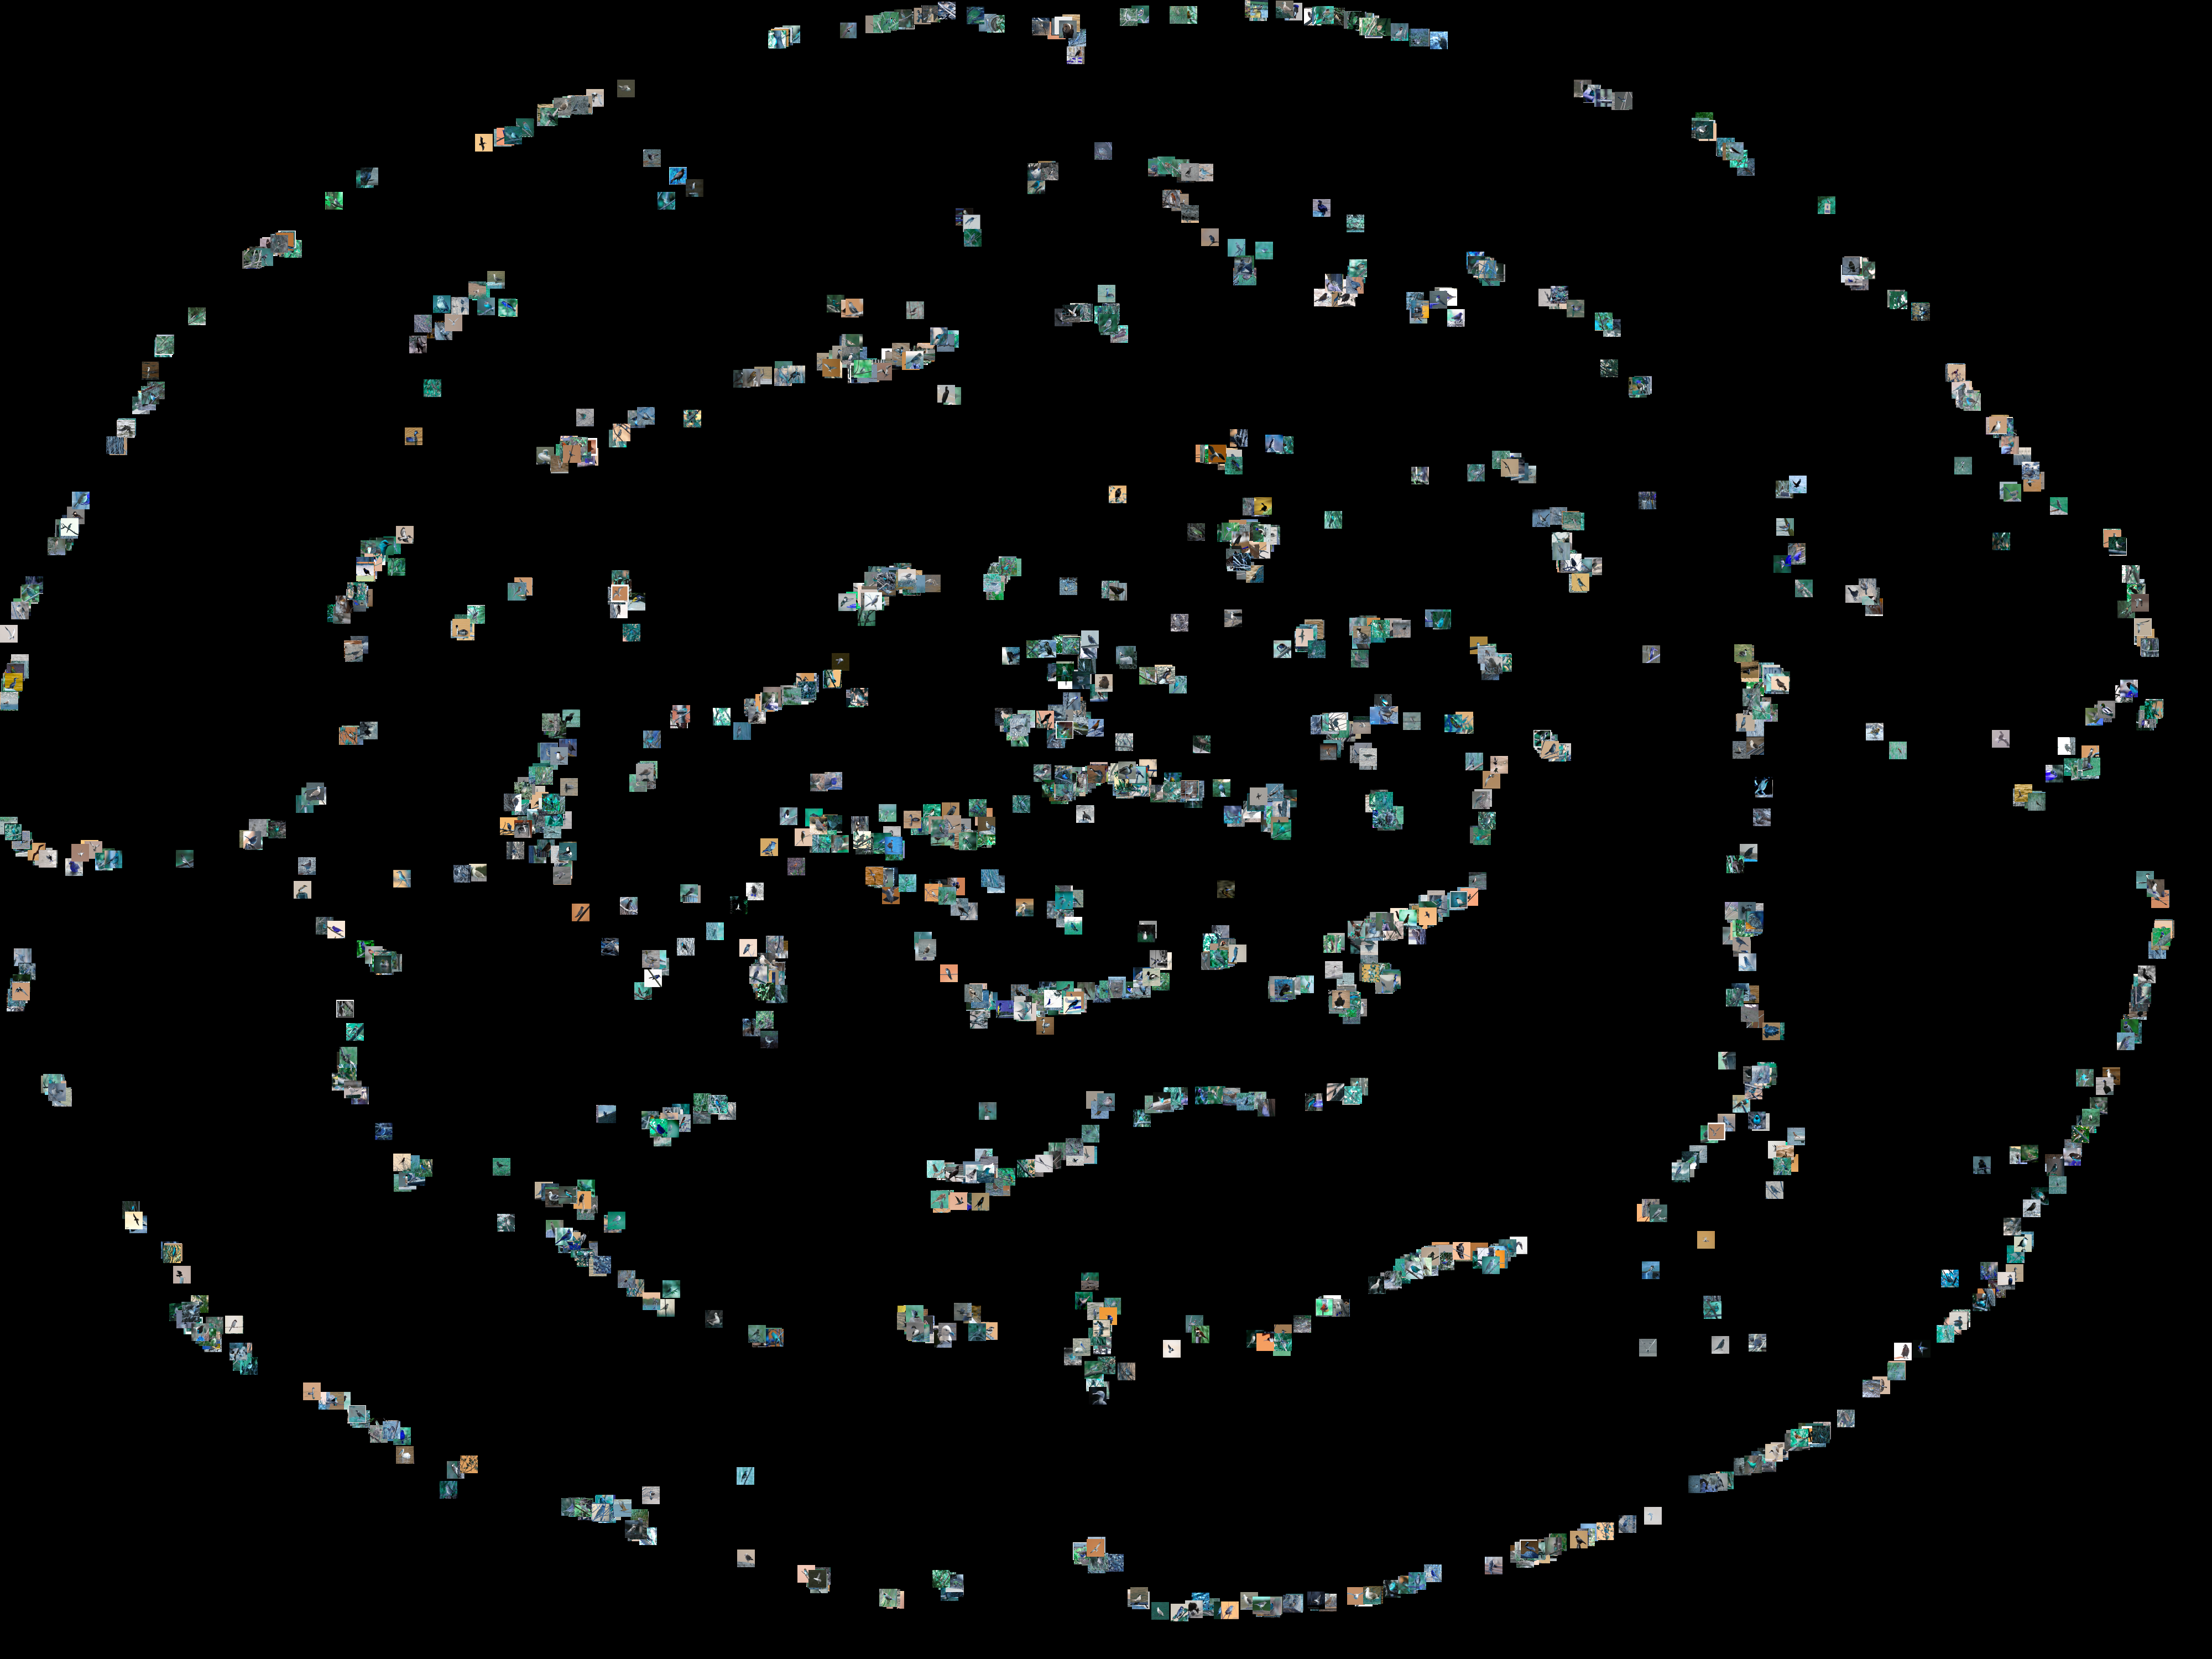

In [82]:
full_image

In [122]:

img = expand_dims(X_test_32[12,:,:], axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(X_test_32)
# get feature map for first hidden

In [128]:
vgg_model = VGG16(weights = "imagenet", include_top=False, input_shape = (32, 32, 3))
vgg_model.summary()

# Freeze four convolution blocks
for layer in vgg_model.layers[:15]:
    layer.trainable = False

    
reset_graph()
model = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[1].output)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [145]:
def plot_featuremap(image):
    feature_maps = model.predict(image)
    ix = 1
    for i in range(8):
        for j in range(8):
            # specify subplot and turn of axis
            ax = plt.subplot(8, 8, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(feature_maps[0, :, :, ix-1])
            ix += 1
    #show the figure
    plt.show()

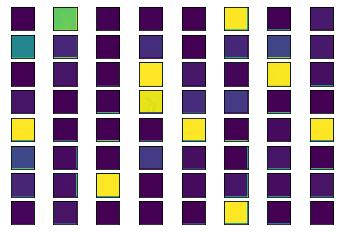

In [147]:
img = X_test_32[15]
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
plot_featuremap(img)

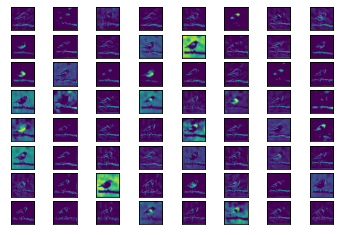

In [155]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


image_path = 'E:/uOttawa/SecondTerm/CV/Assignment/2/CV_Assignment2/CUB_200_2011/bird.png'
img = load_img(image_path, target_size=(64,64))
x   = img_to_array(img)      
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
plot_featuremap(img)

Discuss here.